### Import and Read in CSV

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style()

In [2]:
df = pd.read_csv('/csv/sqr_comments_sentiment.csv')

---

### Correlation Heatmap (zoom in for better view)

Target variable is only highly correlated with the metrics that were taken to construct it.

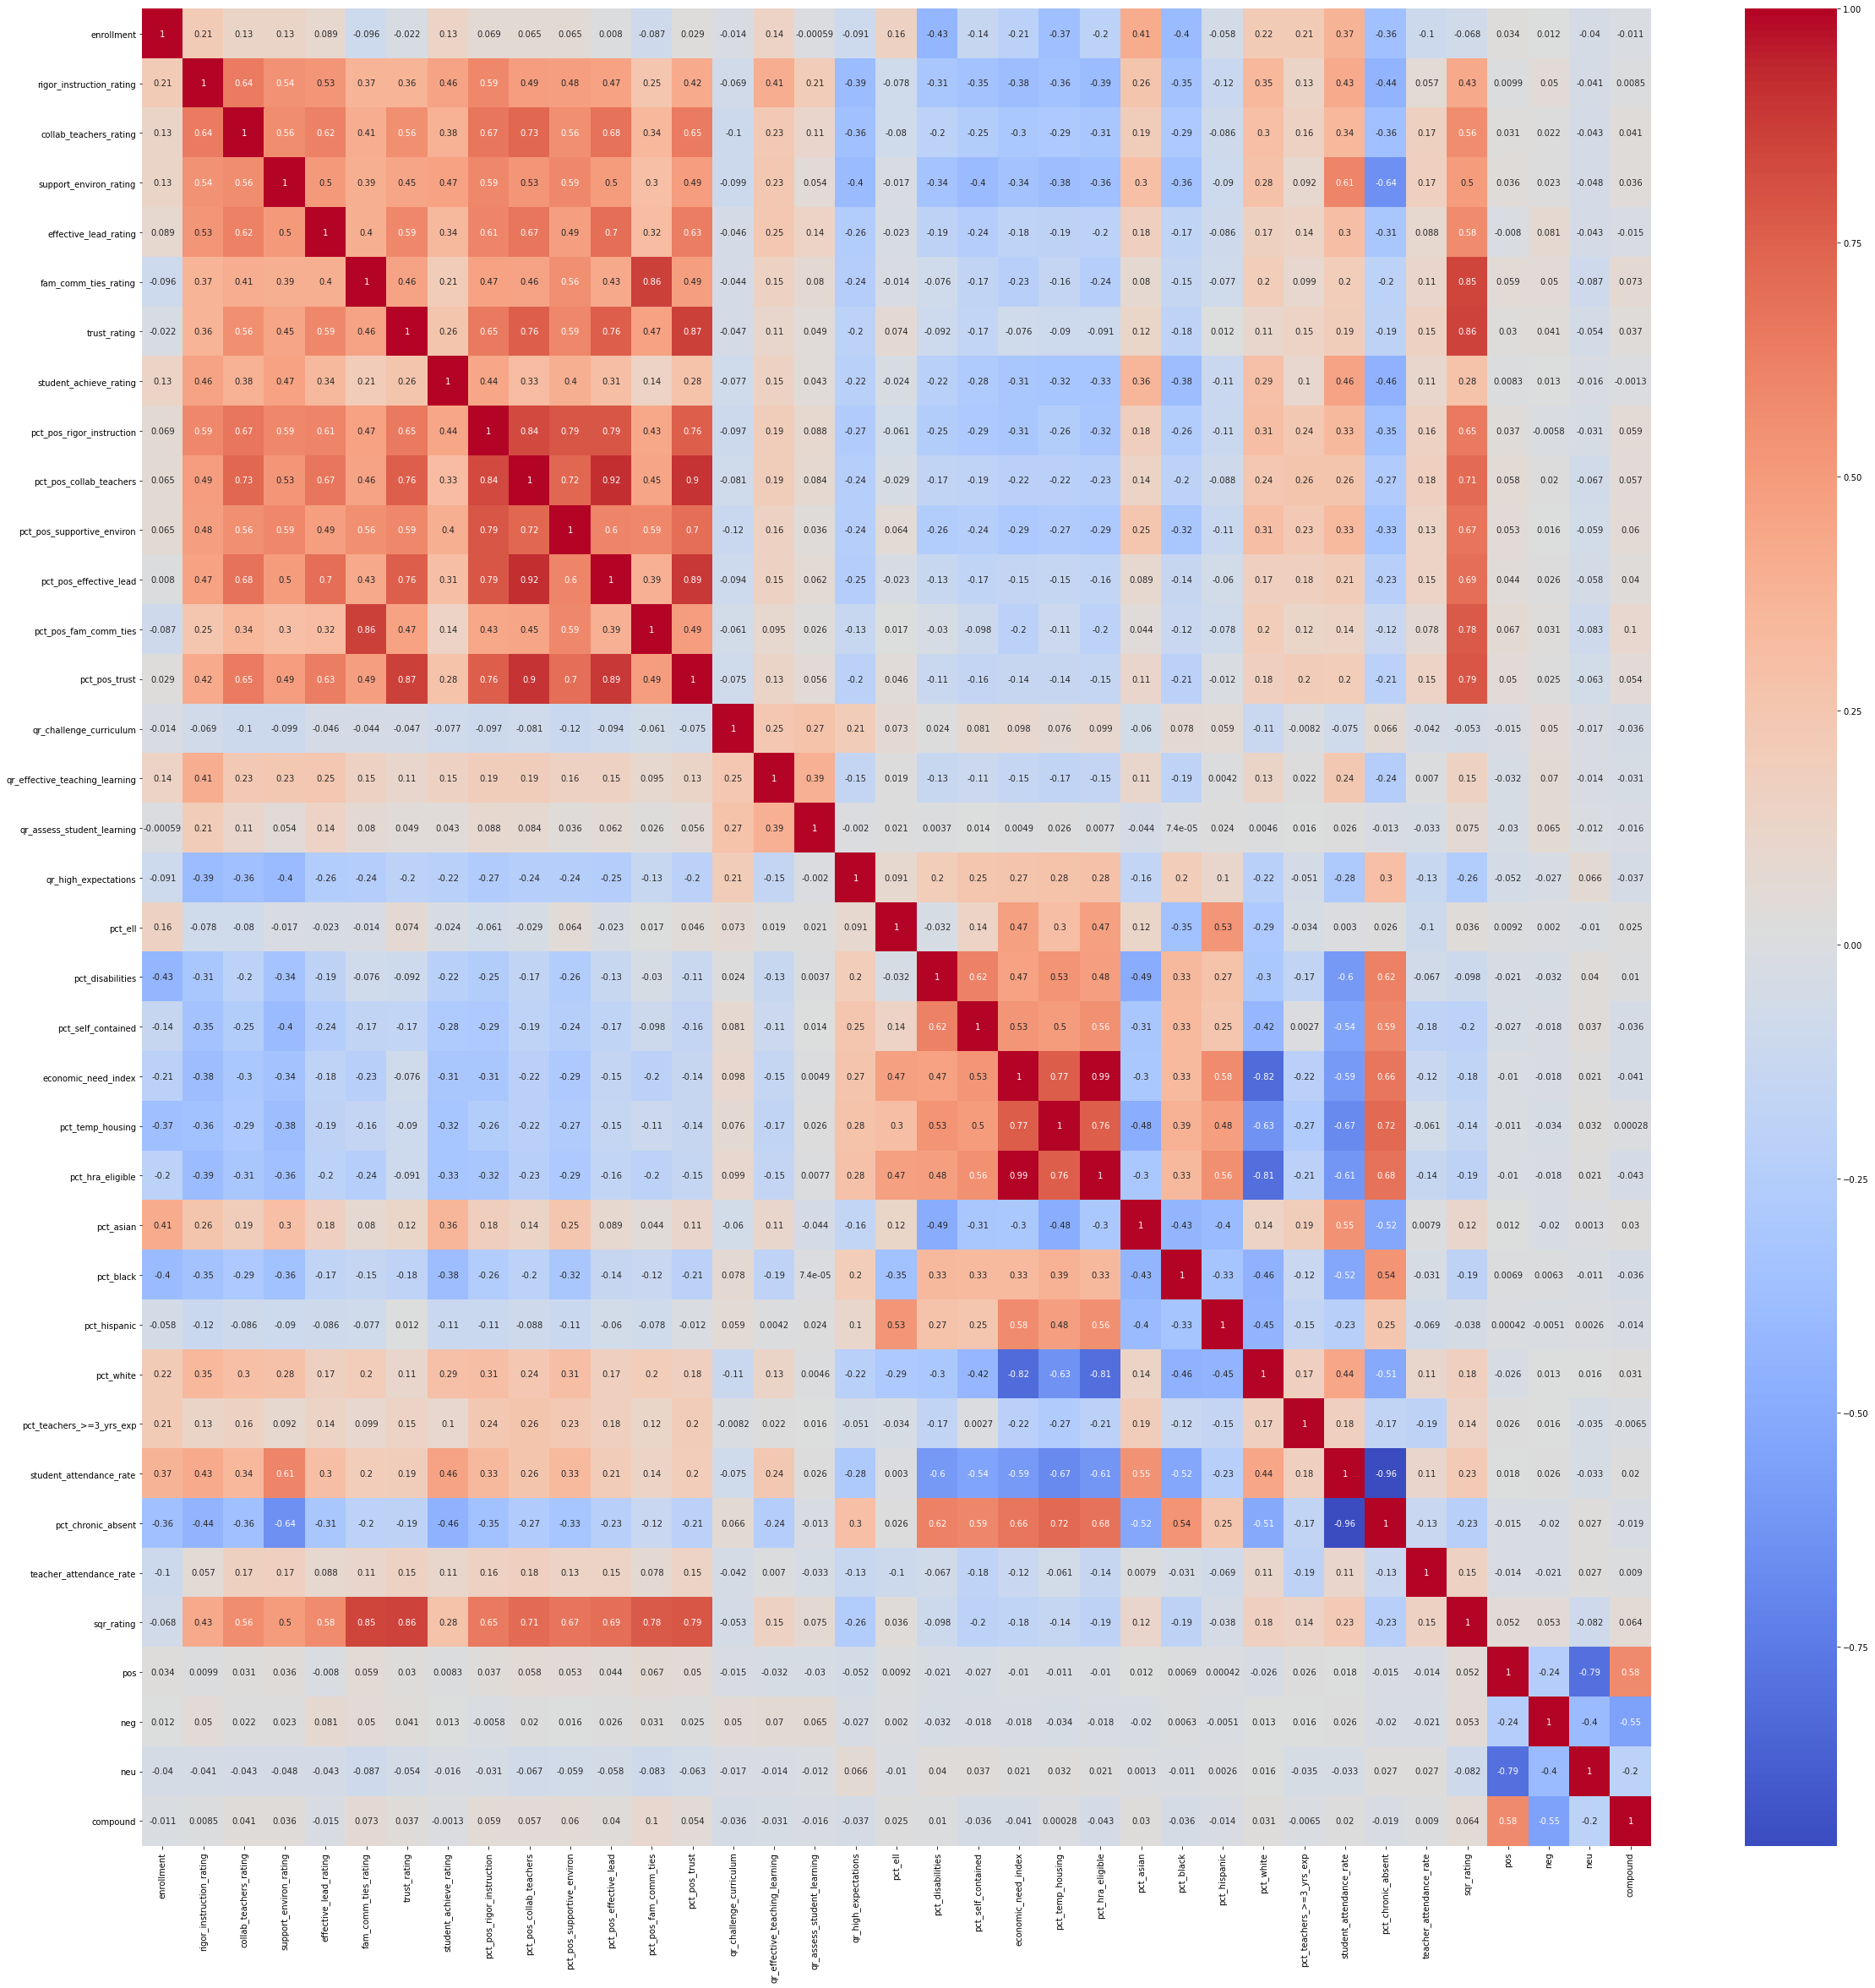

In [136]:
fig, ax = plt.subplots(figsize=(40,40))
corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot=True, cmap='coolwarm')
plt.show()

### Grade Level Frequency

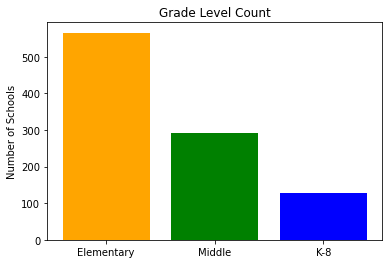

Elementary    566
Middle        291
K-8           128
Name: school_type, dtype: int64


In [43]:
plt.bar(df.school_type.value_counts().index, df.school_type.value_counts().values, color=['orange', 'green', 'blue']) 
plt.title('Grade Level Count')
plt.ylabel('Number of Schools')
plt.show()
print(df.school_type.value_counts())

### Grade level by borough

In [44]:
df.groupby(['school_type', 'borough']).count()

dbn  school_name  enrollment  \
school_type borough                                       
Elementary  bronx          119          119         119   
            brooklyn       184          184         184   
            manhattan       87           87          87   
            queens         138          138         138   
            staten_island   38           38          38   
K-8         bronx           16           16          16   
            brooklyn        37           37          37   
            manhattan       40           40          40   
            queens          32           32          32   
            staten_island    3            3           3   
Middle      bronx           81           81          81   
            brooklyn        91           91          91   
            manhattan       53           53          53   
            queens          55           55          55   
            staten_island   11           11          11   

                           rigor_instruction_rating  collab_teachers_rating  \
school_type borough                                                           
Elementary  bronx                               119                     119   
            brooklyn                            184                     184   
            manhattan                            87                      87   
            queens                              138                     138   
            staten_island                        38                      38   
K-8         bronx                                16                      16   
            brooklyn                             37                      37   
            manhattan                            40                      40   
            queens                               32                      32   
            staten_island                         3                       3   
Middle      bronx                                81                      81   
            brooklyn                             91                      91   
            manhattan                            53                      53   
            queens                               55                      55   
            staten_island                        11                      11   

                           support_environ_rating  effective_lead_rating  \
school_type borough                                                        
Elementary  bronx                             119                    119   
            brooklyn                          184                    184   
            manhattan                          87                     87   
            queens                            138                    138   
            staten_island                      38                     38   
K-8         bronx                              16                     16   
            brooklyn                           37                     37   
            manhattan                          40                     40   
            queens                             32                     32   
            staten_island                       3                      3   
Middle      bronx                              81                     81   
            brooklyn                           91                     91   
            manhattan                          53                     53   
            queens                             55                     55   
            staten_island                      11                     11   

                           fam_comm_ties_rating  trust_rating  \
school_type borough                                             
Elementary  bronx                           119           119   
            brooklyn                        184           184   
            manhattan                        87            87   
            queens                          138           138

### Grade level ratio by borough

In [72]:
print('Bronx')
print('Total: ' + str(119 + 16 + 81))
print('Elementary: ' + str(119/216))
print('K-8: ' + str(16/216))
print('Middle: ' + str(81/216))
print('Brooklyn')
print('Total: ' + str(184 + 37 + 91))
print('Elementary: ' + str(184/312))
print('K-8: ' + str(37/312))
print('Middle: ' + str(91/312))
print('Manhattan')
print('Total: ' + str(87 + 40 + 53))
print('Elementary: ' + str(87/180))
print('K-8: ' + str(40/180))
print('Middle: ' + str(53/180))
print('Queens')
print('Total: ' + str(138 + 32 + 55))
print('Elementary: ' + str(138/225))
print('K-8: ' + str(32/225))
print('Middle: ' + str(55/225))
print('Staten Island')
print('Total: ' + str(38 + 3 + 11))
print('Elementary: ' + str(38/52))
print('K-8: ' + str(3/52))
print('Middle: ' + str(11/52))

Bronx
Total: 216
Elementary: 0.5509259259259259
K-8: 0.07407407407407407
Middle: 0.375
Brooklyn
Total: 312
Elementary: 0.5897435897435898
K-8: 0.11858974358974358
Middle: 0.2916666666666667
Manhattan
Total: 180
Elementary: 0.48333333333333334
K-8: 0.2222222222222222
Middle: 0.29444444444444445
Queens
Total: 225
Elementary: 0.6133333333333333
K-8: 0.14222222222222222
Middle: 0.24444444444444444
Staten Island
Total: 52
Elementary: 0.7307692307692307
K-8: 0.057692307692307696
Middle: 0.21153846153846154


---

### SQR Aggregate Ratings (1-7)

sqr_rating column is the average of fam_comm_ties_rating and trust_rating columns.

In [79]:
# Summary statistics
print('median      ' + str(df.sqr_rating.median()))
print(df.fam_comm_ties_rating.describe().round(2))

median      6.0
count    985.00
mean       0.83
std        0.17
min        0.25
25%        0.75
50%        0.75
75%        1.00
max        1.00
Name: fam_comm_ties_rating, dtype: float64


In [80]:
# Family/Community ties ratings count
df.sqr_rating.value_counts()

5.0    307
6.0    268
7.0    228
4.0    132
3.0     37
2.0     12
1.0      1
Name: sqr_rating, dtype: int64

The majority of the values seem are centered around the 5-7 range with very few values of 1-3.

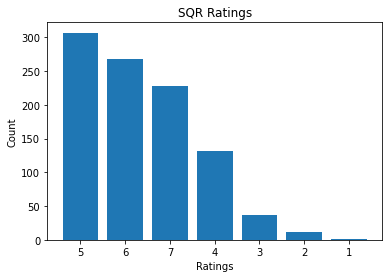

In [81]:
plt.bar(['5', '6', '7', '4', '3', '2', '1'], df.sqr_rating.value_counts().values)
plt.title('SQR Ratings')
plt.xlabel('Ratings')
plt.ylabel('Count')
plt.show()

---

### Sentiment Scores

**Compound Scores:** According to the official Vader Github page, "The compound score is computed by summing the valence scores of each word in the lexicon, adjusted according to the rules, and then normalized to be between -1 (most extreme negative) and +1 (most extreme positive). This is the most useful metric if you want a single unidimensional measure of sentiment for a given sentence." (https://github.com/cjhutto/vaderSentiment)

Distribution of SQR rating's relationship to compound values is more broad than expected. It would be expected that as the compound score's value rises the other scores would also rise because a school that performs well in various SQR metrics should theoretically reflect that in the positive sentiment of the comments.

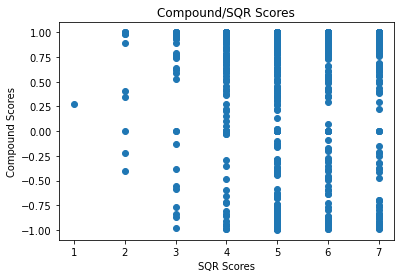

In [95]:
plt.scatter(df.sqr_rating.values, df.compound.values)
plt.title('Compound/SQR Scores')
plt.xlabel('SQR Scores')
plt.ylabel('Compound Scores')
plt.show()

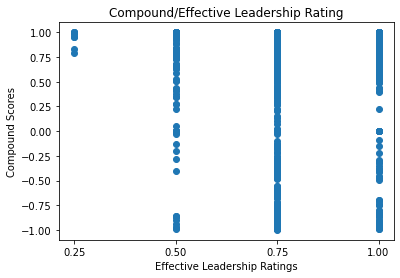

In [117]:
plt.scatter(df.effective_lead_rating.values, df.compound.values)
plt.title('Compound/Effective Leadership Rating')
plt.xticks(ticks=[0.25,0.50,0.75,1])
plt.xlabel('Effective Leadership Ratings')
plt.ylabel('Compound Scores')
plt.show()

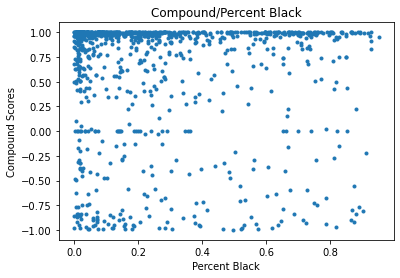

In [129]:
plt.scatter(df.pct_black.values, df.compound.values, marker='.')
plt.title('Compound/Percent Black')
plt.xlabel('Percent Black')
plt.ylabel('Compound Scores')
plt.show()

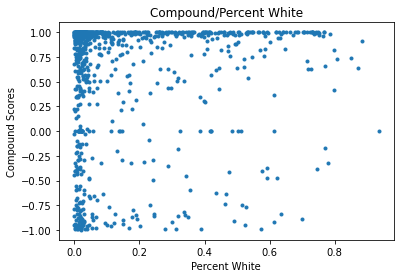

In [133]:
plt.scatter(df.pct_white.values, df.compound.values, marker='.')
plt.title('Compound/Percent White')
plt.xlabel('Percent White')
plt.ylabel('Compound Scores')
plt.show()

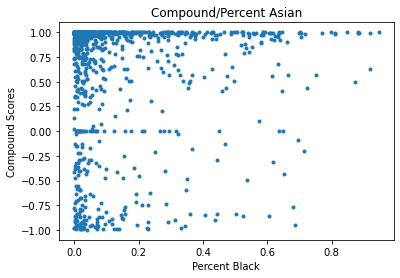

In [131]:
plt.scatter(df.pct_asian.values, df.compound.values, marker='.')
plt.title('Compound/Percent Asian')
plt.xlabel('Percent Asian')
plt.ylabel('Compound Scores')
plt.show()

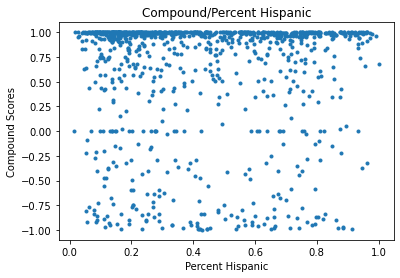

In [134]:
plt.scatter(df.pct_hispanic.values, df.compound.values, marker='.')
plt.title('Compound/Percent Hispanic')
plt.xlabel('Percent Hispanic')
plt.ylabel('Compound Scores')
plt.show()

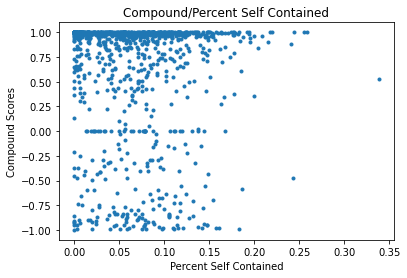

In [135]:
plt.scatter(df.pct_self_contained.values, df.compound.values, marker='.')
plt.title('Compound/Percent Self Contained')
plt.xlabel('Percent Self Contained')
plt.ylabel('Compound Scores')
plt.show()

**Positive, Neutral, and Negative Scores:** According to the official Vader Github page, "The pos, neu, and neg scores are ratios for proportions of text that fall in each category (so these should all add up to be 1... or close to it with float operation). These are the most useful metrics if you want multidimensional measures of sentiment for a given sentence." (https://github.com/cjhutto/vaderSentiment)

---

# Percent Positive Family Community Ties

A high mean (0.93) and median (0.94) may indicate that people are giving higher rating than they may actually feel is deserved. https://hbr.org/2016/07/high-online-user-ratings-dont-actually-mean-youre-getting-a-quality-product 

In [82]:
# Summary statistics
print('median      ' + str(df.pct_pos_fam_comm_ties.median()))
print(df.pct_pos_fam_comm_ties.describe().round(2))

median      0.94
count    985.00
mean       0.93
std        0.04
min        0.74
25%        0.92
50%        0.94
75%        0.96
max        1.00
Name: pct_pos_fam_comm_ties, dtype: float64


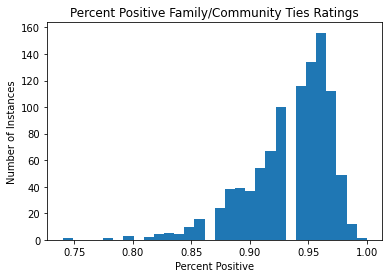

In [83]:
plt.hist(df.pct_pos_fam_comm_ties.values, bins=30)
plt.title('Percent Positive Family/Community Ties Ratings')
plt.xlabel('Percent Positive')
plt.ylabel('Number of Instances')
plt.show()

---

# Trust Rating

In [12]:
# Summary statistics
print('median      ' + str(df.trust_rating.median()))
print(df.trust_rating.describe().round(2))

median      0.75
count    985.00
mean       0.79
std        0.17
min        0.25
25%        0.75
50%        0.75
75%        1.00
max        1.00
Name: trust_rating, dtype: float64


In [13]:
# Trust ratings count
df.trust_rating.value_counts()

0.75    516
1.00    314
0.50    147
0.25      8
Name: trust_rating, dtype: int64

In [14]:
df.groupby(['trust_rating', 'borough']).mean().round(4)

enrollment  rigor_instruction_rating  \
trust_rating borough                                               
0.25         bronx            606.0000                    0.6250   
             brooklyn         376.0000                    0.7500   
             manhattan        240.0000                    0.2500   
             queens           324.0000                    0.6250   
             staten_island    535.0000                    0.2500   
0.50         bronx            523.9565                    0.6033   
             brooklyn         437.8718                    0.6410   
             manhattan        403.4091                    0.6932   
             queens           623.0294                    0.7279   
             staten_island    652.0000                    0.6667   
0.75         bronx            519.0177                    0.7367   
             brooklyn         536.9114                    0.7453   
             manhattan        407.1087                    0.7717   
             queens           791.8175                    0.8353   
             staten_island    698.8889                    0.7593   
1.00         bronx            481.5091                    0.8364   
             brooklyn         529.8938                    0.8451   
             manhattan        378.1231                    0.8423   
             queens           594.0952                    0.8810   
             staten_island    612.2778                    0.8889   

                            collab_teachers_rating  support_environ_rating  \
trust_rating borough                                                         
0.25         bronx                          0.3750                  0.7500   
             brooklyn                       0.5000                  0.6250   
             manhattan                      0.5000                  0.5000   
             queens                         0.3750                  0.7500   
             staten_island                  0.5000                  0.5000   
0.50         bronx                          0.5707                  0.5652   
             brooklyn                       0.6026                  0.6346   
             manhattan                      0.6023                  0.6364   
             queens                         0.6471                  0.6691   
             staten_island                  0.7083                  0.6250   
0.75         bronx                          0.7655                  0.7168   
             brooklyn                       0.7801                  0.7263   
             manhattan                      0.7989                  0.7391   
             queens                         0.8274                  0.7877   
             staten_island                  0.8519                  0.7315   
1.00         bronx                          0.9000                  0.8273   
             brooklyn                       0.8894                  0.8606   
             manhattan                      0.8923                  0.8808   
             queens                         0.9087                  0.8452   
             staten_island                  0.9306                  0.8611   

                            effective_lead_rating  fam_comm_ties_rating  \
trust_rating borough                                                      
0.25         bronx                         0.5000                0.5000   
             brooklyn                      0.3750                0.6250   
             manhattan                     0.5000                0.5000   
             queens                        0.5000                0.6250   
             staten_island                 0.5000                0.2500   
0.50         bronx                         0.6196                0.6359   
             brooklyn                      0.6346                0.7436   
             manhattan                     0.5455                0.7273   
             queens                        0.6544               

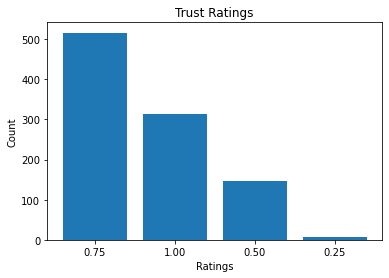

In [15]:
plt.bar(['0.75', '1.00', '0.50', '0.25'], df.trust_rating.value_counts().values)
plt.title('Trust Ratings')
plt.xlabel('Ratings')
plt.ylabel('Count')
plt.show()

---

# Boroughs

In [16]:
# Summary statistics
print('median          ' + str(df.borough.value_counts().median()))
print(df.borough.value_counts().describe())

median          216.0
count      5.000000
mean     197.000000
std       94.451046
min       52.000000
25%      180.000000
50%      216.000000
75%      225.000000
max      312.000000
Name: borough, dtype: float64


In [17]:
df.borough.value_counts()

brooklyn         312
queens           225
bronx            216
manhattan        180
staten_island     52
Name: borough, dtype: int64

In [138]:
df.groupby('borough').mean().round(4)

,enrollment,rigor_instruction_rating,collab_teachers_rating,support_environ_rating,effective_lead_rating,fam_comm_ties_rating,trust_rating,student_achieve_rating,pct_pos_rigor_instruction,pct_pos_collab_teachers,...,pct_white,pct_teachers_>=3_yrs_exp,student_attendance_rate,pct_chronic_absent,teacher_attendance_rate,sqr_rating,pos,neg,neu,compound
borough,,,,,,,,,,,,,,,,,,,,,
bronx,511.3241,0.7326,0.7546,0.7130,0.7500,0.7708,0.7558,0.6782,0.7944,0.8121,...,0.0344,0.7500,0.9137,0.3098,0.9629,5.1065,0.1262,0.0593,0.8145,0.4436
brooklyn,520.9583,0.7684,0.7957,0.7628,0.7917,0.8462,0.8061,0.7043,0.8229,0.8553,...,0.1565,0.7856,0.9237,0.2612,0.9647,5.6090,0.1321,0.0530,0.8149,0.6210
manhattan,395.2611,0.7847,0.8069,0.7764,0.7722,0.8681,0.8069,0.7653,0.8240,0.8411,...,0.2009,0.7624,0.9314,0.2249,0.9684,5.7000,0.1468,0.0496,0.8037,0.8385
queens,706.7911,0.8300,0.8189,0.7856,0.7933,0.8422,0.7778,0.7344,0.8233,0.8422,...,0.1384,0.8338,0.9414,0.1770,0.9628,5.4800,0.1367,0.0539,0.8094,0.5724
staten_island,660.3462,0.7837,0.8558,0.7596,0.8173,0.8510,0.7981,0.7212,0.8306,0.8815,...,0.4247,0.8821,0.9312,0.2162,0.9650,5.5962,0.1148,0.0468,0.8384,0.4650


Chronic absences by borough. Queens has the lowest average percent of chronic absences with an average value of 17.70% while the Bronx has the highest with 30.98%

In [140]:
df.groupby('borough')['pct_chronic_absent'].mean().round(4)

borough
bronx            0.3098
brooklyn         0.2612
manhattan        0.2249
queens           0.1770
staten_island    0.2162
Name: pct_chronic_absent, dtype: float64

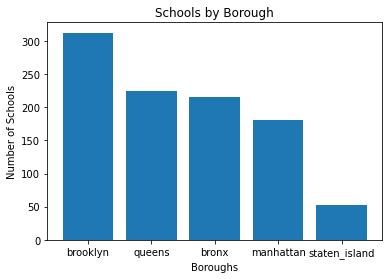

In [19]:
plt.bar(df.borough.value_counts().index.values, df.borough.value_counts().values)
plt.title('Schools by Borough')
plt.xlabel('Boroughs')
plt.ylabel('Number of Schools')
plt.show()